# Full revision analysis

## List of work to be performed:
1. Supplementary figure showing incorrect inform tumor segmentation and NKT cells 

    1.2. images of zero NK cells from inForm and remake Figure 3a
    
    1.3. images of CD3-CD8+ cells
2. Supplementary figure with zoom-in images of individual cells from inForm and TME-Analyzer in an image with high disagreement 
3. Incorporation of DeepCell into TME-Analyzer 
4. Reorganize the MonteCarlo trials 
5. Supplementary table 6 with full ranking of parameters and discovery/validation p values if top n parameters were used instead. 
6. Generate forest plot for 4E 
7. Build classifier based on train-test split of discovery cohort. Try 16-47, 32-31, 47-16 splits. 
8. ? It is significant amount of work, but since both reviewers mention is, I can train a random forest on the original dataset and report it ? 

##     1.3. images of CD3-CD8+ cells

In [2]:
import os
import pandas as pd
import numpy as np
px_size = 0.4999

automated_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data tables/'
inform_folder = 'E:/Moved from E/Dora effector/data_tables_inform/'
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/"

phenos = ['CD20','CD3','CD3 CD8','CD56','CD68','CK','other','All']

tissues = ['All', 'Stroma', 'Tumor']

os.chdir(automated_folder)
auto_xls = os.listdir()
auto_xls = [i for i in auto_xls if i[-4:] == '.xls']
MSI_names_temp = [i[:i.find(']')+1] for i in auto_xls]
MSI_names = []
MSI_names_excluded = []
for MSI in MSI_names_temp:
    try:
        inform_data = pd.read_csv(inform_folder + MSI + '_cell_seg_data_summary.txt', sep='\t')
        MSI_names.append(MSI)
    except:
        MSI_names_excluded.append(MSI)

phenos = ['CD3-CD8+']

tissues = ['All', 'Stroma', 'Tumor']
analysis_methods = ['auto']
panda_cols = []
panda_cols.append('location')
for pheno in phenos:
    for tissue in tissues:
        for method in analysis_methods:
            panda_cols.append('number of ' + pheno + ' in ' + tissue + ' found by ' + method + ' analysis')
            panda_cols.append('density of ' + pheno + ' in ' + tissue + ' found by ' + method + ' analysis')

data_frame = pd.DataFrame(index = MSI_names_temp, columns = panda_cols)

for n_f, MSI in enumerate(MSI_names_temp):
    auto_data = pd.read_excel(MSI + '_component_data.xls')
    if 'border' in inform_data['Path'][0]:
        data_frame.loc[MSI]['location'] = 'border'
    elif 'center' in inform_data['Path'][0]:
        data_frame.loc[MSI]['location'] = 'center'
    for tissue in tissues:
        if tissue == 'All':
            auto_of_interest = [i for i,j in enumerate(auto_data['Segments'].to_numpy()) if tissue in j]
        else:
            auto_of_interest = [i for i,j in enumerate(auto_data['Segments'].to_numpy()) if tissue + '+'  in j]
        auto_of_interest = auto_data.iloc[auto_of_interest,:]
        tissue_area_auto = np.sum(auto_of_interest['Cell Area'])
        for pheno in phenos:
            if tissue_area_auto > 0 :
                pheno_of_interest = auto_of_interest['Phenotypes'].to_numpy()
                if pheno == 'CD3-CD8+':
                    pheno_of_interest = [i for i,j in enumerate(pheno_of_interest) if (('CD3+' not in j) & ('CD8+' in j))]
                data_frame.loc[MSI]['density of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = len(pheno_of_interest)/tissue_area_auto*1000000
                data_frame.loc[MSI]['number of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = len(pheno_of_interest)
            else:
                data_frame.loc[MSI]['density of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = 0
                data_frame.loc[MSI]['number of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = 0

data_frame.to_excel(output_folder + 'CD3-CD8+_quantification2.xls')

In [5]:
import shutil
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/CD3-CD8+_workplaces/"
output_folder2 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/CD3-CD8+_images/"
pickle_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/workplaces/'

phenotype_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/Analysis Effector TNBC/image_with_phenotype_map/"
inform_images = [i for i in os.listdir(phenotype_folder)]
images_of_interest = []
for i in data_frame.index:
    try:
        if data_frame.loc[i,'number of CD3-CD8+ in All found by auto analysis']>100:
            images_of_interest.append(i)
    except:
        pass
# [i for i in data_frame.index if data_frame.loc[i,'number of NKT in All found by auto analysis']>10]
is_restart = True
for im_name in images_of_interest:
    if len([i for i in inform_images if im_name in i]) == 0:
        is_restart = False
    if is_restart:
        continue
    shutil.copy(pickle_folder+im_name+'_component_data.pickle',output_folder+im_name+'_component_data.pickle')
    if len([i for i in inform_images if im_name in i]) > 0:
        i = [i for i in inform_images if im_name in i][0]
        n_i = data_frame.loc[im_name,'number of CD3-CD8+ in All found by auto analysis']
        shutil.copy(phenotype_folder + i,output_folder2 + f"{n_i:04d}_" + i)


In [6]:
import pickle
# import matplotlib.gridspec as gridspec

pickle_folder = 'E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/CD3-CD8+_workplaces/'
selected_file = 'DH-87-00547 excl_[37695,15648]_component_data.pickle'
selected_file = 'DH-85-01716 infl_[54702,11806]_component_data.pickle'
selected_file = 'DH-97-02200 infl_[40680,12709]_component_data.pickle'
pickle_data = pickle.load(open(pickle_folder + selected_file, "rb"))
# skimage.io.imread(filename)
Cell_props = pickle_data['Cell_props']
x1, x2, y1, y2 = 900,1200,500,700
x1, x2, y1, y2 = 0,1340,0,1004
CD8_not_cells = [i for i in Cell_props.index if ('CD3+' not in Cell_props.loc[i,'Phenotypes']) & ('CD8+' in Cell_props.loc[i,'Phenotypes'])]
CD4_cells = [i for i in Cell_props.index if ('CD3+' in Cell_props.loc[i,'Phenotypes']) & ('CD8+' not in Cell_props.loc[i,'Phenotypes']) & ('CD56+' not in Cell_props.loc[i,'Phenotypes'])]
CD8_cells = [i for i in Cell_props.index if ('CD3+' in Cell_props.loc[i,'Phenotypes']) & ('CD8+' in Cell_props.loc[i,'Phenotypes']) & ('CD56+' not in Cell_props.loc[i,'Phenotypes'])]
# CD56_cells = [i for i in Cell_props.index if ('CD3+' not in Cell_props.loc[i,'Phenotypes']) & ('CD56+' in Cell_props.loc[i,'Phenotypes'])]
CD8_not_locs = Cell_props.loc[CD8_not_cells,'Cell Centroid'].to_numpy()
CD8_not_locs_crop = []
for i in CD8_not_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_not_locs_crop.append([i[0]-y1,i[1]-x1])

CD4_locs = Cell_props.loc[CD4_cells,'Cell Centroid'].to_numpy()
CD4_locs_crop = []
for i in CD4_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_crop.append([i[0]-y1,i[1]-x1])

CD8_locs = Cell_props.loc[CD8_cells,'Cell Centroid'].to_numpy()
CD8_locs_crop = []
for i in CD8_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_crop.append([i[0]-y1,i[1]-x1])

# CD56_locs = Cell_props.loc[CD56_cells,'Cell Centroid'].to_numpy()
# CD56_locs_crop = []
# for i in CD56_locs:
#     if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
#         CD56_locs_crop.append([i[0]-y1,i[1]-x1])


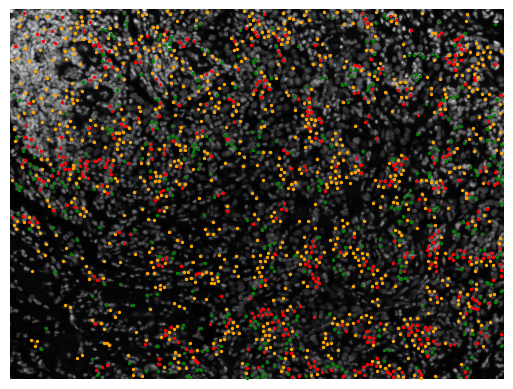

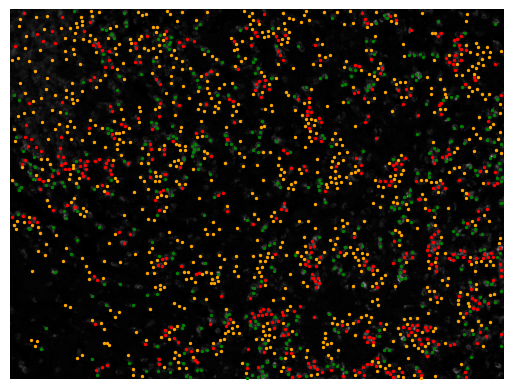

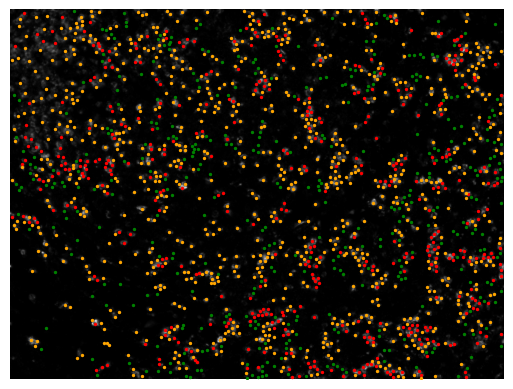

In [21]:

from matplotlib import pyplot as plt
for i in [0,3,1]:
    plt.figure()
    plt.imshow(pickle_data['im_raw'][:,:,i])
    plt.axis('off')
    plt.set_cmap('gray')
    for i in CD8_locs:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],s=2,marker='o',color='red')
    for i in CD4_locs:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],s=2,marker='o',color='green')
    for i in CD8_not_locs:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],s=2,marker='o',color='orange')
    # for i in nkt_locs_crop:
    #     plt.scatter(i[1],i[0],marker='X',color='red')
    #     plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)
    

In [8]:
pickle_data['Channel_pointers']

['DAPI', 'CD8', 'CD20', 'CD3', 'CD68', 'CD56', 'CK', 'background']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


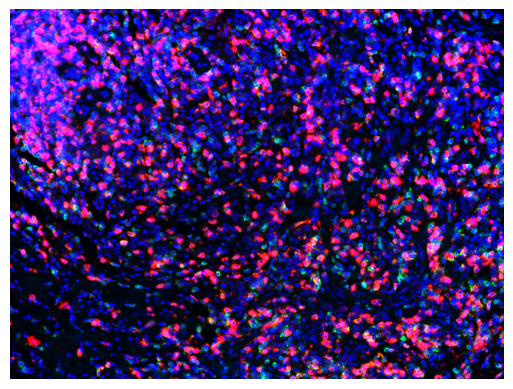

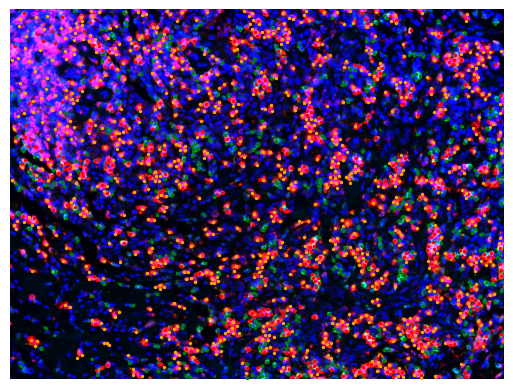

In [23]:

plt.figure()
to_plot = pickle_data['im_raw'][:,:,[1,3,0]]/4
to_plot[:,:,2] /= 10
to_plot[:,:,1] /= 1
to_plot[:,:,0] /= 2
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
plt.figure()
to_plot = pickle_data['im_raw'][:,:,[1,3,0]]/4
to_plot[:,:,2] /= 10
to_plot[:,:,1] /= 1
to_plot[:,:,0] /= 2
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='red')
for i in CD4_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='green')
for i in CD8_not_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='orange')

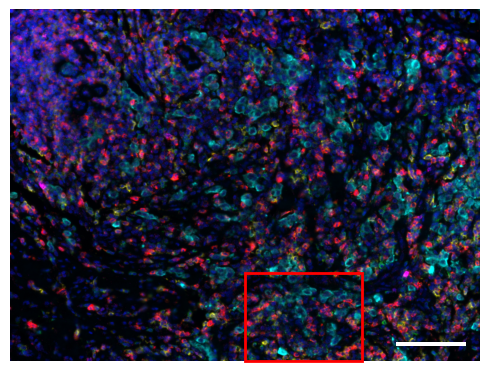

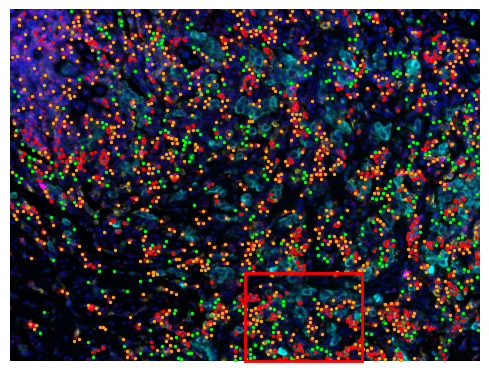

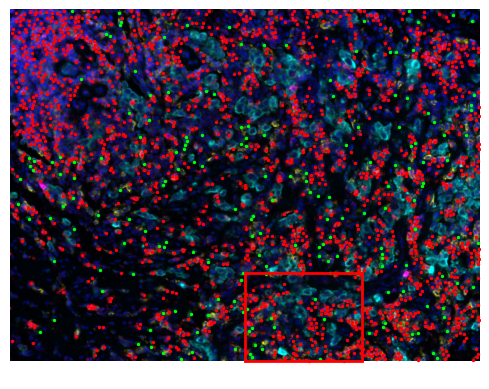

In [41]:
import skimage.io
import matplotlib.patches

px_size = 0.4999
to_plot = skimage.io.imread("E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/inForm_output_images/" + 
                            selected_file.replace("_component_data.pickle","_composite_image.tif"))
x11, x12, y11, y12 = 670,1005,753,1004
plt.figure()
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='none')
plt.gca().add_patch(matplotlib.patches.Rectangle((x11,y11),x12-x11,y12-y11,ec='red',fc='none',lw=2))
plt.gca().add_patch(matplotlib.patches.Rectangle((1100,950),100/px_size,10,ec='none',fc='white'))
plt.figure()
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='red')
for i in CD4_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='lime')
for i in CD8_not_locs:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='orange')
plt.gca().add_patch(matplotlib.patches.Rectangle((x11,y11),x12-x11,y12-y11,ec='red',fc='none',lw=2))
plt.figure()
import pandas as pd
inform_analysis = pd.read_csv("E:/Moved from E/grants/202004_TUDelft_master/shared with Daniel/TNBC cohort/inform analysis/" + 
                              selected_file.replace("_component_data.pickle","_cell_seg_data.txt"),sep='\t')
CD3_locs_crop_inform = []
CD56_locs_crop_inform = []
inform_analysis.keys()
CD8_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3 CD8']
CD4_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3']
# CD56_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD56']
          
CD4_locs_inform = inform_analysis.loc[CD4_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD4_locs_inform_crop = []
for i in CD4_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_inform_crop.append([i[0]-y1,i[1]-x1])
  
CD8_locs_inform = inform_analysis.loc[CD8_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD8_locs_inform_crop = []
for i in CD8_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_inform_crop.append([i[0]-y1,i[1]-x1])
  
# CD56_locs_inform = inform_analysis.loc[CD56_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
# CD56_locs_inform_crop = []
# for i in CD56_locs_inform:
#     if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
#         CD56_locs_inform_crop.append([i[0]-y1,i[1]-x1])

to_plot = skimage.io.imread("E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/inForm_output_images/" + 
                            selected_file.replace("_component_data.pickle","_composite_image.tif"))
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs_inform:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='red')
for i in CD4_locs_inform:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=2,marker='o',color='lime')
# for i in CD56_locs_inform_crop:
#     # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
#     plt.scatter(i[1],i[0],marker='X',color='yellow')
# for i in nkt_locs_crop:
#     plt.scatter(i[1],i[0],marker='X',color='red')
#     plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)

plt.gca().add_patch(matplotlib.patches.Rectangle((x11,y11),x12-x11,y12-y11,ec='red',fc='none',lw=2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


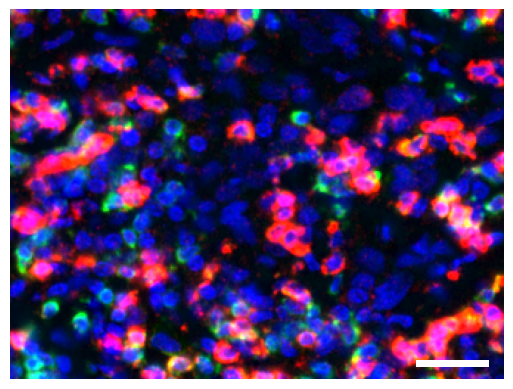

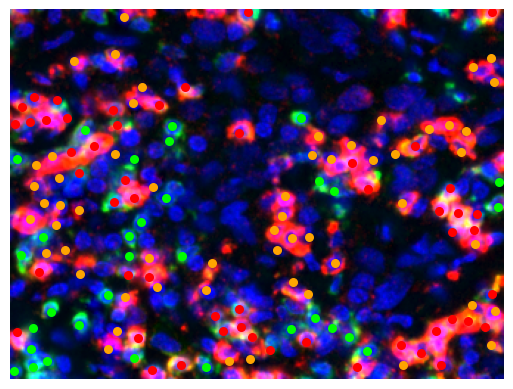

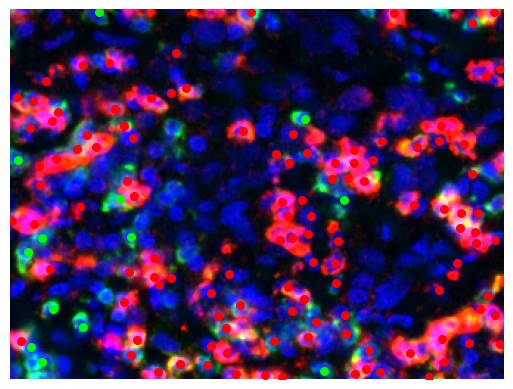

In [40]:
x1, x2, y1, y2 = 670,1005,753,1004
dot_size = 30
plt.figure()
to_plot = pickle_data['im_raw'][y1:y2,x1:x2,[1,3,0]]/4
to_plot[:,:,2] /= 10
to_plot[:,:,1] /= 1
to_plot[:,:,0] /= 2
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
plt.gca().add_patch(matplotlib.patches.Rectangle((1100/4,950/4),25/px_size,5,ec='none',fc='white'))

plt.figure()
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
CD8_not_locs = Cell_props.loc[CD8_not_cells,'Cell Centroid'].to_numpy()
CD8_not_locs_crop = []
for i in CD8_not_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_not_locs_crop.append([i[0]-y1,i[1]-x1])

CD4_locs = Cell_props.loc[CD4_cells,'Cell Centroid'].to_numpy()
CD4_locs_crop = []
for i in CD4_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_crop.append([i[0]-y1,i[1]-x1])

CD8_locs = Cell_props.loc[CD8_cells,'Cell Centroid'].to_numpy()
CD8_locs_crop = []
for i in CD8_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_crop.append([i[0]-y1,i[1]-x1])
for i in CD8_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=dot_size,marker='o',color='red')
for i in CD4_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=dot_size,marker='o',color='lime')
for i in CD8_not_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=dot_size,marker='o',color='orange')

inform_analysis = pd.read_csv("E:/Moved from E/grants/202004_TUDelft_master/shared with Daniel/TNBC cohort/inform analysis/" + 
                              selected_file.replace("_component_data.pickle","_cell_seg_data.txt"),sep='\t')
CD3_locs_crop_inform = []
CD56_locs_crop_inform = []
inform_analysis.keys()
CD8_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3 CD8']
CD4_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3']
# CD56_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD56']
          
CD4_locs_inform = inform_analysis.loc[CD4_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD4_locs_inform_crop = []
for i in CD4_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_inform_crop.append([i[0]-y1,i[1]-x1])
  
CD8_locs_inform = inform_analysis.loc[CD8_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD8_locs_inform_crop = []
for i in CD8_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_inform_crop.append([i[0]-y1,i[1]-x1])
plt.figure()
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs_inform_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=dot_size,marker='o',color='red')
for i in CD4_locs_inform_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],s=dot_size,marker='o',color='lime')
# for i in CD56_locs_inform_crop:
#     # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
#     plt.scatter(i[1],i[0],marker='X',color='yellow')
# for i in nkt_locs_crop:
#     plt.scatter(i[1],i[0],marker='X',color='red')
#     plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)

In [ ]:

# plt.figure()
# to_plot = pickle_data['im_raw'][y1:y2,x1:x2,[5,3,0]]/4
# to_plot[:,:,2] /= 10
# to_plot[:,:,1] /= 2
# plt.imshow(to_plot)
# plt.axis('off')
# plt.set_cmap('gray')
# plt.figure()
# to_plot = pickle_data['im_raw'][y1:y2,x1:x2,[5,3,0]]/4
# to_plot[:,:,2] /= 10
# to_plot[:,:,1] /= 2
# plt.imshow(to_plot)
# plt.axis('off')
# plt.set_cmap('gray')
# for i in CD8_locs_crop:
#     # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
#     plt.scatter(i[1],i[0],marker='o',color='red')
# for i in CD4_locs_crop:
#     # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
#     plt.scatter(i[1],i[0],marker='o',color='green')
# for i in CD8_not_locs:
#     # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
#     plt.scatter(i[1],i[0],marker='o',color='orange')

